In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Label Encoding Genre Column

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lb = LabelEncoder()

In [11]:
data[['Genre']]  = lb.fit_transform(data[['Genre']])

C:\Users\Administrator\Anaconda3\envs\deep\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [12]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [13]:
X = data.iloc[:,1:]

In [14]:
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [15]:
wcss = []

testing histograms

In [16]:
test = pd.DataFrame(X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE8C301080>,
      dtype=object)

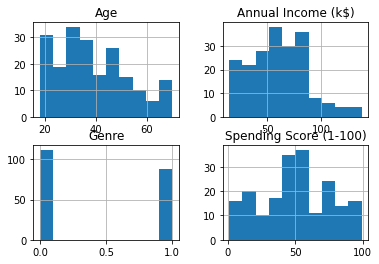

In [17]:
test.hist()

In [20]:
from sklearn.cluster import KMeans

plotting Within Cluster Sum of Squares to find optimal number of clusters in K Means

In [22]:
for i in range(1,11):
    km = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    km.fit(X)
    wcss.append(km.inertia_)

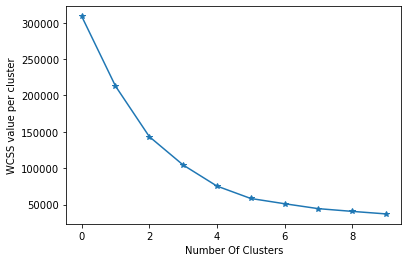

In [24]:
plt.plot(wcss,marker = '*')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS value per cluster')
plt.show()

found 4 or 5 clusters to be optimal ... Finding predicted Y based on 4 clusters 

In [25]:
km = KMeans(n_clusters = 4,init ='k-means++',random_state = 42)

In [26]:
y_km = km.fit_predict(X)

In [ ]:
Performing Hierarchical Clustering

In [ ]:
Plotting Dendrogram to find optimal numbers of clusters 

In [29]:
import scipy.cluster.hierarchy as dg

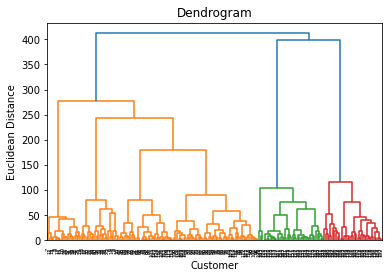

In [30]:
dgr = dg.dendrogram(dg.linkage(X,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering 
amc = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'ward')

In [32]:
y_hc = amc.fit_predict(X)

In [33]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

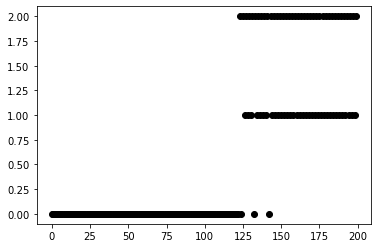

In [38]:
plt.plot(y_hc,'ok')

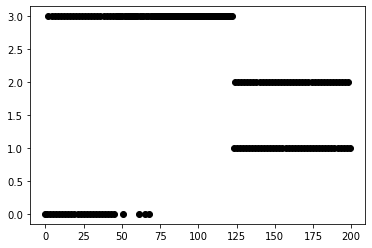

In [40]:
plt.plot(y_km,'ok')